### Callin Switzer
###

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import os
import csv
import time
from scipy import signal
import itertools as it
import sys
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import scipy.io
import glob
import itertools

# Neural net libs
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
print("TensorFlow successfully installed.")
if tf.test.is_built_with_cuda():
    print("The installed version of TensorFlow includes GPU support.")

print(sys.version, "\n")
print("last run on " + str(datetime.now()))

Using TensorFlow backend.


TensorFlow successfully installed.
The installed version of TensorFlow includes GPU support.
3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)] 

last run on 2018-08-17 15:19:24.650913


In [2]:
# data directory
dataDir = r"D:\Dropbox\dataAnalysisForOthers\MothMuscleLength\Data"

# figure directory
figDir = r"D:\Dropbox\dataAnalysisForOthers\MothMuscleLength\Figures" 
if not os.path.exists(figDir):
    os.makedirs(figDir)
    
# data output
dataOut = r"D:\Dropbox\dataAnalysisForOthers\MothMuscleLength\DataOut" 
if not os.path.exists(dataOut):
    os.makedirs(dataOut)

In [3]:
# read in data

In [4]:
musLen = pd.read_csv(os.path.join(dataDir, "2018_06_22_trial4", "length.csv"))
musLen.drop(axis = 1, columns=musLen.columns[0], inplace=True)
print(musLen.shape)
musLen["sec2"] = np.round(musLen.sec, decimals=4)
musLen.head(20)

(901, 2)


,length,sec,sec2
0,0.145567,0.000000,0.0000
1,-0.136849,0.001111,0.0011
2,-0.153147,0.002222,0.0022
3,0.319831,0.003333,0.0033
4,0.324240,0.004444,0.0044
5,-0.170393,0.005556,0.0056
6,0.341818,0.006667,0.0067
7,0.523763,0.007778,0.0078
8,0.036397,0.008889,0.0089
9,0.092109,0.010000,0.0100


In [5]:
emg  = pd.read_csv(os.path.join(dataDir, "2018_06_22_trial4", "pretrigemg.csv"))
emg.drop(axis = 1, columns=emg.columns[0], inplace=True)
emg["sec2"] = np.round(emg.sec, decimals=4)
print(emg.shape)
emg.head(10)

(25001, 3)


,EMG,sec,sec2
0,-0.46510,0.00000,0.0000
1,-0.46280,0.00004,0.0000
2,-0.46050,0.00008,0.0001
3,-0.45885,0.00012,0.0001
4,-0.45688,0.00016,0.0002
5,-0.45162,0.00020,0.0002
6,-0.44965,0.00024,0.0002
7,-0.44768,0.00028,0.0003
8,-0.44373,0.00032,0.0003
9,-0.44077,0.00036,0.0004


In [6]:
comF = pd.merge(musLen,emg,  on = ["sec2"], how = "inner")
comF.drop_duplicates(subset = "length", inplace = True)
comF.reset_index(drop = True, inplace = True)

In [7]:
print(comF.shape)
comF.tail()

(900, 5)


,length,sec_x,sec2,EMG,sec_y
895,-0.212098,0.995556,0.9956,0.270400,0.99556
896,0.325924,0.996667,0.9967,0.053400,0.99668
897,-0.039642,0.997778,0.9978,-0.107710,0.99776
898,0.463553,0.998889,0.9989,-0.089294,0.99888
899,0.600102,1.000000,1.0000,-0.068909,0.99996


In [8]:
sm = comF.iloc[0:1000, ].copy()


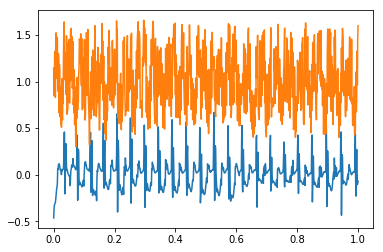

In [9]:
#plt.plot(sm.timestamp, sm.EMG)
plt.plot(sm.sec2, sm.EMG)
#plt.show()
plt.plot(sm.sec2, sm.length + 1)

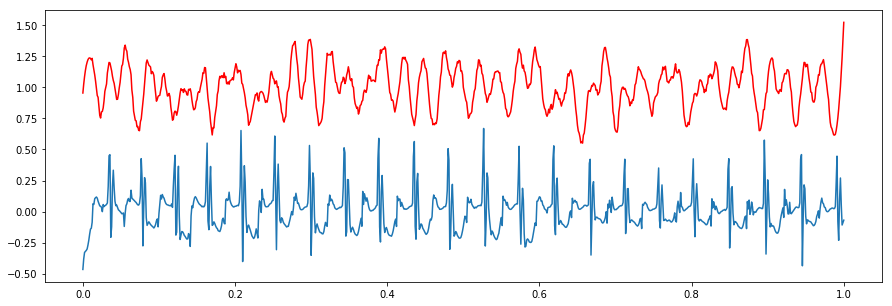

In [38]:
from scipy.signal import savgol_filter
yhat = savgol_filter(sm.length + 1, 21, 3) # window size 51, polynomial order 3

#plt.plot(sm.sec2,sm.length + 1)
plt.figure(figsize = (15, 5))
plt.plot(sm.sec2,yhat, color='red')
plt.plot(sm.sec2, sm.EMG)
plt.show()

In [11]:
from FFTUtils import * 

In [12]:
# plot FFT spectrum
spect = FFT(sm.length, log_rate = 900.0)

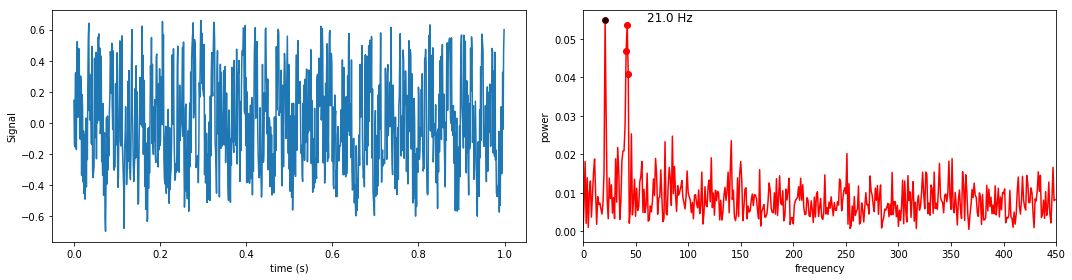

In [13]:
spect.FFT(fmin = 10, fmax = 45)
spect.plotFFT(fmin = 0, fmax =450)

___
# practice with made-up data
# tutorial here: https://www.youtube.com/watch?v=2np77NOdnwk
___

In [14]:
timesteps = np.arange(0, 50.01, 0.01 )
trainX = np.sin(2*np.pi*timesteps) + np.random.normal(size=len(timesteps))*0.1
trainY =  np.cos(2*np.pi*timesteps) * ((np.cos(2*np.pi*timesteps)) > 0.999)*1 + np.random.normal(size=len(timesteps))*0.1

In [15]:
timesteps = np.arange(0, 10, 0.001 )

freq = np.sin(2*np.pi*timesteps) + 10

trainX = np.sin(2*np.pi*timesteps* freq) + np.random.normal(size=len(timesteps))*0.1
trainY =  np.cos(2*np.pi*timesteps * freq) * ((np.cos(2*np.pi*timesteps*freq)) > 0.99)*1 + np.random.normal(size=len(timesteps))*0.1
trainX.shape

(10000,)

In [16]:
timesteps = np.arange(0, 10, 0.001 )

freq = 1

trainX = np.sin(2*np.pi*timesteps* freq) + np.random.normal(size=len(timesteps))*0.1
trainY =  np.cos(2*np.pi*timesteps * freq) * ((np.cos(2*np.pi*timesteps*freq)) > 0.99)*1 + np.random.normal(size=len(timesteps))*0.1
trainX.shape

(10000,)

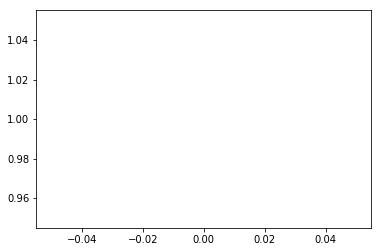

In [17]:
plt.plot(freq)

In [18]:
# timesteps = np.array(comF.sec2)
# trainX = np.array(comF.length)
# trainY =  np.array(comF.EMG)

# trainX.shape

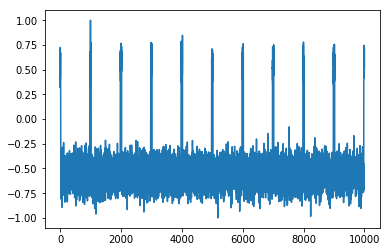

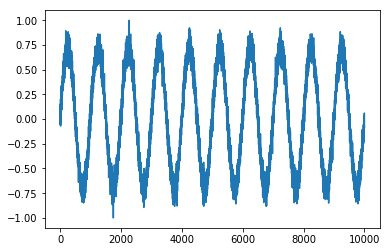

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaleX = MinMaxScaler(feature_range=[-1,1])
trainX_scaled = scaleX.fit_transform(trainX.reshape(-1, 1))

scaleY = MinMaxScaler(feature_range = [-1,1])
trainY_scaled = scaleY.fit_transform(trainY.reshape(-1, 1))

trainY_scaled = trainY_scaled.reshape(-1)
trainX_scaled = trainX_scaled.reshape(-1)
plt.plot(trainY_scaled)
trainY_scaled.shape
plt.show()

plt.plot(trainX_scaled)

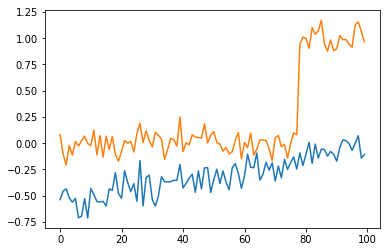

In [20]:
plt.plot(trainX[-100:])
plt.plot(trainY[-100:])

In [21]:
# reshape data
def reshape_data2(sequence, ysequence, seq_len):
    sequence_length = seq_len + 1
    result = []
    for index in range(len(sequence) - sequence_length):
        result.append(sequence[index: index + sequence_length])
    result = np.array(result)
    
    result2 = []
    for index in range(len(ysequence) - sequence_length):
        result2.append(ysequence[index: index + sequence_length])
    result2 = np.array(result2)
    
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    train2 = result2[:int(row), :]
    # shuffle windows
    #shuffInt = np.random.choice(np.arange(0, train.shape[1]), replace=False, size=train.shape[1])
#     train = train[:, shuffInt]
#     train2 = train2[:, shuffInt]
    #np.random.shuffle(train)
    
    x_train = train2[:, :-1]
    y_train = train[:, -1]
    x_test = result2[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    
    
    return [x_train, y_train, x_test, y_test]

In [22]:
x_train, y_train, x_test, y_test = reshape_data2(trainX_scaled, trainY_scaled, 500)
x_train.shape

(8549, 500, 1)

In [23]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [24]:
def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_shape=(None, layers[0]),
        units=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(units = layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="adam", metrics = ['mse'])
    print("> Compilation Time : ", time.time() - start)
    return model

In [27]:
model= build_model([1,50,100,1])
earlystop = EarlyStopping(monitor='val_mean_squared_error', min_delta=0.0001, patience=20, verbose=1, mode='auto')

> Compilation Time :  0.01795172691345215


In [28]:
model_info = model.fit(x_train, y_train, batch_size = 512*4, epochs=1000, validation_split=0.05, callbacks = [earlystop])

Train on 8121 samples, validate on 428 samples
Epoch 1/1000
8121/8121 [==============================] - 9s 1ms/step - loss: 0.2599 - mean_squared_error: 0.2599 - val_loss: 0.2681 - val_mean_squared_error: 0.2681
Epoch 2/1000
8121/8121 [==============================] - 8s 1ms/step - loss: 0.2588 - mean_squared_error: 0.2588 - val_loss: 0.2964 - val_mean_squared_error: 0.2964
Epoch 3/1000
8121/8121 [==============================] - 8s 1ms/step - loss: 0.2588 - mean_squared_error: 0.2588 - val_loss: 0.2808 - val_mean_squared_error: 0.2808
Epoch 4/1000
8121/8121 [==============================] - 8s 1ms/step - loss: 0.2586 - mean_squared_error: 0.2586 - val_loss: 0.2758 - val_mean_squared_error: 0.2758
Epoch 5/1000
8121/8121 [==============================] - 8s 1ms/step - loss: 0.2586 - mean_squared_error: 0.2586 - val_loss: 0.2864 - val_mean_squared_error: 0.2864
Epoch 6/1000
8121/8121 [==============================] - 8s 1ms/step - loss: 0.2586 - mean_squared_error: 0.2586 - val_los

In [29]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,1,figsize=(10,5))
    # summarize history for accuracy
    axs.plot(range(1,len(model_history.history['mean_squared_error'])+1),model_history.history['mean_squared_error'])
    axs.plot(range(1,len(model_history.history['val_mean_squared_error'])+1),model_history.history['val_mean_squared_error'])
    axs.set_title('Model MSE')
    axs.set_ylabel('mean_squared_error')
    axs.set_xlabel('Epoch')
    axs.set_xticks(np.arange(1,len(model_history.history['val_mean_squared_error'])+1),len(model_history.history['val_mean_squared_error'])/10)
    axs.legend(['train', 'val'], loc='best')
    plt.show()

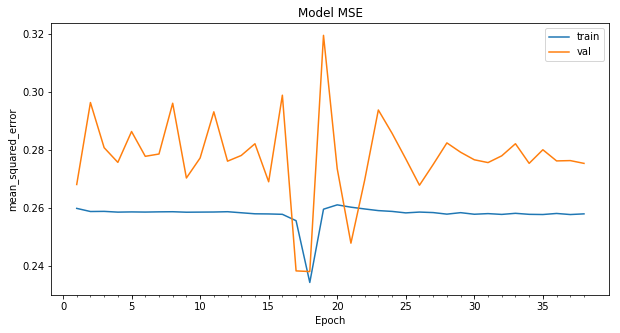

In [30]:
plot_model_history(model_info)

In [31]:
def predict_point_by_point(model, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

In [32]:
predicted = predict_point_by_point(model, x_test)
predicted.shape

(950,)

In [33]:
propBreak = 0.9
windowLen = 200

backCt = int(len(trainX) - propBreak * len(trainX) + propBreak * windowLen)
print(backCt)

1180


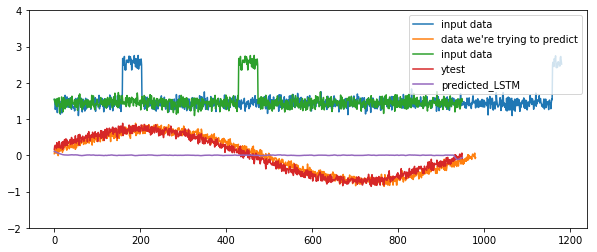

In [34]:
plt.figure(figsize = (10,4))
plt.plot(trainY_scaled[-(backCt + 1):] + 2, label = "input data")
plt.plot(trainX_scaled[-(backCt-windowLen +1):], label = "data we're trying to predict")

plt.plot(x_test[:,0,0] + 2, label = "input data")
plt.plot(y_test[:], label = "ytest")
#plt.plot(yhat[-81:] -1, label = "smoothed")
plt.ylim([-2, 4])
plt.plot(predicted, label = 'predicted_LSTM')
plt.legend()
#plt.plot(y_test)
#plt.savefig(os.path.join(figDir, "LSTM_MadeUpData.png"), dpi = 500)


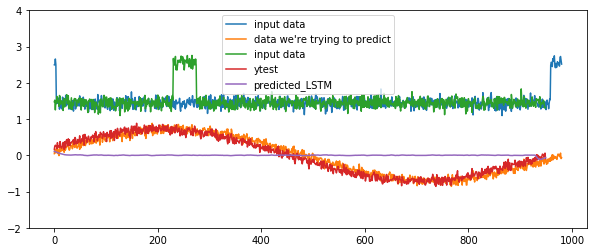

In [35]:
plt.figure(figsize = (10,4))
plt.plot(trainY_scaled[-(backCt - windowLen +  1):] + 2, label = "input data")
plt.plot(trainX_scaled[-(backCt-windowLen +1):], label = "data we're trying to predict")

plt.plot(x_test[:,windowLen-1,0] + 2, label = "input data")
plt.plot(y_test[:], label = "ytest")

plt.ylim([-2, 4])
plt.plot(predicted, label = 'predicted_LSTM')
plt.legend()


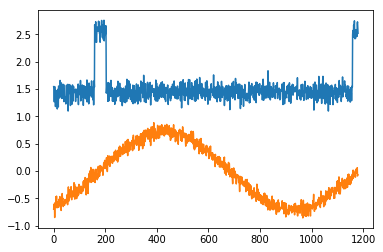

In [36]:
plt.plot(trainY_scaled[-(backCt + 1):] + 2, label = "input data")
plt.plot(trainX_scaled[(-backCt):], label = "data we're trying to predict")

In [ ]:
results = reshape_data(trainX, 50)

In [ ]:
np.random.shuffle(results)
results.shape

shuffInt = np.random.choice(np.arange(0, results.shape[1]), replace=False, size=results.shape[1])
results[:, shuffInt]

In [ ]:
shuffInt = np.random.choice(np.arange(0, result.shape[0]), replace=False, size=result.shape[0])
    train = train[:, shuffInt]